# IMAGE SEGMENTATION 

<span style="color:green;font-weight:700;font-size:20px">
Image segmentation is a computer vision task that involves dividing an image into multiple segments or regions based on certain criteria, such as color, texture, or object boundaries. The goal of image segmentation is to simplify the representation of an image into meaningful and coherent parts, making it easier to analyze and understand the content of the image.

There are different types of image segmentation techniques, each with its own approach:

Semantic Segmentation: This type of segmentation involves labeling each pixel in an image with the class it belongs to. The classes typically correspond to different objects or regions in the image. The output is a "mask" that assigns a class label to every pixel, without distinguishing instances of the same class.

Instance Segmentation: In this technique, the goal is to segment an image into different object instances. Unlike semantic segmentation, instance segmentation differentiates between individual instances of the same class. Each object instance is assigned a unique label, and pixels belonging to the same instance share the same label.

Panoptic Segmentation: Panoptic segmentation combines both semantic and instance segmentation. It aims to provide a comprehensive understanding of the scene by labeling each pixel with either a semantic class or an instance label, making it suitable for scenarios where both object-level and category-level information is important.

Boundary-Based Segmentation: This method focuses on detecting and segmenting object boundaries based on changes in intensity, color, or texture. It might not provide pixel-level segmentation masks but rather outlines or edges of objects.

Region-Based Segmentation: This approach groups pixels with similar properties into regions. It often uses techniques like region growing or splitting and merging to segment the image.

Graph-Based Segmentation: Graph-based methods treat image segmentation as a graph partitioning problem, where pixels are nodes and edges represent relationships between pixels. By optimizing the graph partition, the image is segmented into coherent regions.

Deep Learning-Based Segmentation: With the advent of deep learning, convolutional neural networks (CNNs) have been widely used for image segmentation tasks. Fully Convolutional Networks (FCNs), U-Net, SegNet, and Mask R-CNN are examples of architectures used for various types of segmentation.

<span style="color:Blue;font-weight:700;font-size:20px">
    Thresholding
</span>

<span style="color:red;font-weight:700;font-size:20px">
    Thresholding is a basic image segmentation technique used to create binary images by separating objects from the background based on intensity values. The idea behind thresholding is to set a threshold value and classify pixels as either foreground (object) or background based on whether their intensity values are above or below the threshold.

There are several methods of thresholding, each with its own approach to selecting the threshold value:

Global Thresholding: In global thresholding, a single threshold value is used to classify all pixels in the image. Pixels with intensity values below the threshold are considered background, and those above are considered foreground.

Adaptive Thresholding: Adaptive thresholding is used when the lighting conditions vary across the image. Instead of using a single global threshold, adaptive thresholding uses local threshold values based on the intensity of surrounding pixels. This helps handle variations in lighting and contrast.

Otsu's Thresholding: Otsu's method calculates an "optimal" threshold that minimizes the intra-class variance of the foreground and background pixels. It's particularly useful when the separation between foreground and background intensities is well-defined.

Hysteresis Thresholding: Hysteresis thresholding is often used in edge detection. It involves defining two threshold values: a high threshold and a low threshold. Pixels with intensities above the high threshold are classified as edges, and those between the low and high thresholds are classified as edges if they are connected to strong edge pixels.
</span>

<span style="color:yellow;font-weight:700;font-size:20px">
Thresholding Algorithm Steps:

Image Preparation:
Load the image you want to segment.
Convert the image to grayscale if it's a color image, as thresholding is often applied to grayscale images.

Choosing a Threshold Value:
Select a threshold value to separate foreground and background pixels.
The threshold value can be chosen manually based on domain knowledge or experimentally by observing pixel intensity histograms.
Thresholding Process:

For each pixel in the image:
If the pixel's intensity value is above the threshold, classify it as part of the foreground.
If the pixel's intensity value is below the threshold, classify it as part of the background.
Generating Binary Image:

The result of thresholding is a binary image where pixels are classified as either foreground or background.
Foreground pixels are typically represented as white (255), and background pixels are represented as black (0).
</span>

In [1]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import imageio as iio
import skimage.color
import skimage.filters


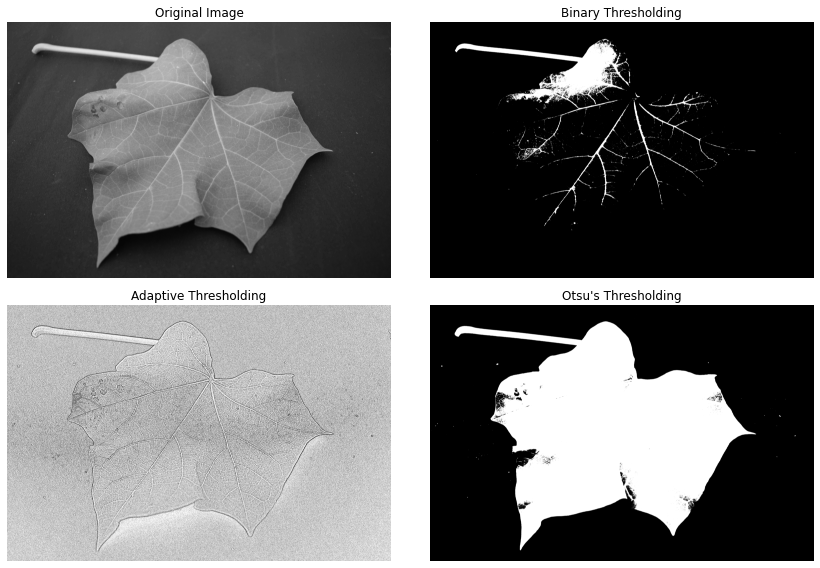

In [2]:
# Load the image in grayscale
image = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG", cv2.IMREAD_GRAYSCALE)

# Binary Thresholding
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Thresholding")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_threshold, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_9300/2993008762.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  shapes01 = iio.imread(uri="C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")


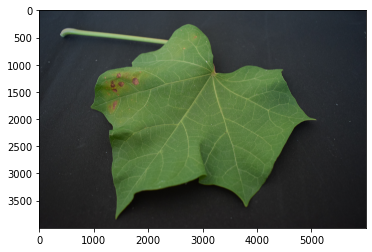

In [3]:
# load the image
shapes01 = iio.imread(uri="C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")

fig, ax = plt.subplots()
plt.imshow(shapes01)

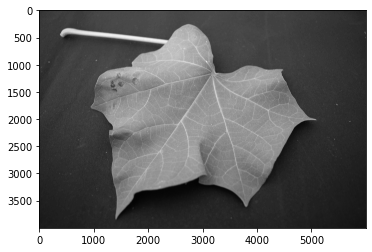

In [4]:
# convert the image to grayscale
gray_shapes = skimage.color.rgb2gray(shapes01)

# blur the image to denoise
blurred_shapes = skimage.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_shapes, cmap="gray")

(0.0, 1.0)

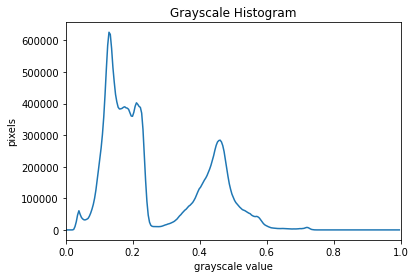

In [5]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

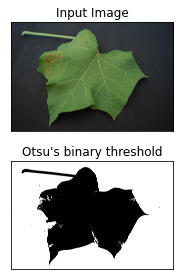

In [6]:
# otsu's thresholding
img = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

<span style="color:Blue;font-weight:700;font-size:20px">
    Region Based Image Segmentation
</span>

<span style="color:red;font-weight:700;font-size:20px">
Region-based image segmentation involves dividing an image into coherent regions based on certain criteria, such as color similarity, texture, or intensity. One popular technique for region-based segmentation is the Watershed algorithm. Here's a step-by-step explanation and Python code example for performing region-based segmentation using the Watershed algorithm:

Algorithm Steps: Watershed Image Segmentation

Gradient Calculation: Calculate the gradient magnitude of the image to identify potential markers for segmentation.

Marker Generation: Identify markers in the image that represent potential regions. These markers are usually determined based on gradient values.

Marker Labeling: Label the markers and assign unique IDs to each region.

Flood Filling: Perform a flood filling operation starting from the markers to segment the image into different regions.
</span>

<span style="color:red;font-weight:700;font-size:20px">
The Watershed algorithm is a method used for image segmentation that treats pixel values as topographical elevations. It simulates the flooding of a landscape and considers the boundaries formed by the rising water as the segmentation regions. Here are the general steps of the Watershed algorithm:

Preprocessing:
Convert the image to grayscale.
Enhance the contrast if necessary.

Gradient Calculation:
Calculate the gradient magnitude of the image (e.g., using Sobel, Scharr, or other filters).
The gradient highlights edges and transitions in the image.

Marker Generation:
Create markers indicating potential region boundaries or seeds for the watershed algorithm.
These markers can be manually defined or obtained from thresholding, distance transforms, or other methods.

Marker Labeling:
Label the markers with unique integer values.
The unmarked regions are typically labeled as 0.

Flood-Filling Simulation:
Treat the intensity values as heights and simulate flooding of the landscape.
Start from the lowest markers and progressively raise the water level until it reaches higher markers.

Region Merging:
As the water rises, regions from different markers will merge.
The algorithm keeps track of the labels of markers contributing to each pixel.

Label Propagation:
Continue raising the water level until all pixels are labeled.
Assign the label of the highest marker that contributed to each pixel.

Watershed Lines:
Pixels that have multiple contributing markers are marked as watershed lines (boundary regions).

Post-processing:
Remove watershed lines by applying morphological operations.
Apply additional filtering or cleanup if necessary.

The Watershed algorithm can be applied using various libraries, with OpenCV being a popular choice in Python. Keep in mind that the Watershed algorithm can lead to over-segmentation if not used carefully. Tuning parameters, preprocessing, and marker initialization are essential for achieving accurate results.
</span>

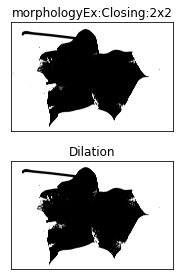

In [7]:
# watershed algorithm 
img = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

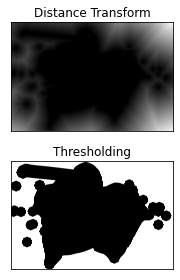

In [8]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

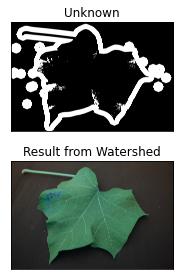

In [9]:
plt.subplot(211),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show

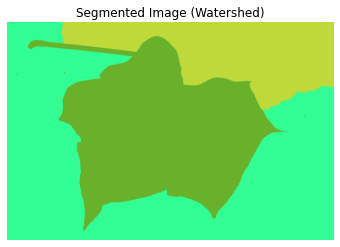

In [10]:
def watershed_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary mask
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations to clean the mask
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Calculate distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Find unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed algorithm
    markers = cv2.watershed(image, markers)
    
    # Mark the segmented regions with different colors
    segment_colors = np.random.randint(0, 256, size=(markers.max() + 1, 3), dtype=np.uint8)
    segmented_image = segment_colors[markers]

    # Display the segmented image
    plt.imshow(segmented_image)
    plt.title("Segmented Image (Watershed)")
    plt.axis('off')
    plt.show()

# Replace with your image path
image_path = "C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG"
watershed_segmentation(image_path)

<span style="color:Blue;font-weight:700;font-size:20px">
Clustering
</span>


<span style="color:red;font-weight:700;font-size:20px">
Clustering-based image segmentation involves grouping similar pixels together based on certain features such as color, intensity, texture, or spatial proximity. One common clustering algorithm used for image segmentation is K-Means.
</span>


<span style="color:yellow;font-weight:700;font-size:20px">
Load the Image:
Load the image you want to segment.

Flatten the Image:
Convert the 2D image matrix into a 1D array of pixels. Each pixel becomes a data point in a higher-dimensional space.

Choose the Number of Clusters (K):
Decide how many clusters (segments) you want the image to be divided into.

Convert Pixels to Feature Vectors:
Each pixel's color information is treated as a feature vector. For an RGB image, the feature vector would be [R, G, B].

Apply K-Means:
Run the K-Means algorithm on the feature vectors. The algorithm will assign each pixel to one of the K clusters based on similarity.

Cluster Centers:
After convergence, the cluster centers represent the dominant colors in the image. These centers can be thought of as the average colors of the segments.

Create a Segmented Image:
Replace the colors of the pixels with the nearest cluster center to create a segmented image.

Display Results:
Display the original image and the segmented image using visualization tools.
</span>

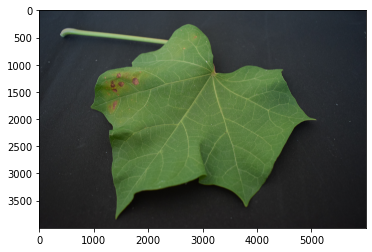

In [11]:
sample_image = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

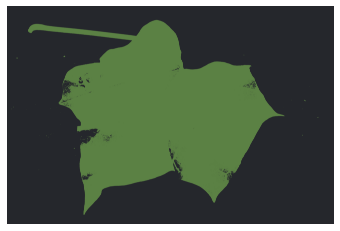

In [14]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)

<span style="color:blue;font-weight:700;font-size:20px">
Region growing image segmentation
</span>

<span style="color:red;font-weight:700;font-size:20px">
Region growing is a simple image segmentation technique that involves grouping pixels together based on similarity criteria. It starts with a seed pixel or region and iteratively grows the region by adding neighboring pixels that meet the similarity criteria. Here are the steps involved in the region growing algorithm for image segmentation:

Choose a Seed Pixel or Region:
Select a pixel (or a small region) as the initial seed for the region growing process.

Define a Similarity Criterion:
Choose a similarity criterion that determines whether a neighboring pixel should be added to the growing region.
This could be based on intensity, color, texture, or other features.

Initialize the Region:
Add the seed pixel to the growing region.

Iterative Region Growing:
For each pixel in the growing region, examine its neighboring pixels (usually 4 or 8 neighbors, depending on the connectivity).
Check if the neighboring pixel meets the similarity criterion to be added to the region.
If it does, add the pixel to the region and mark it as visited.
Repeat this process until no more pixels can be added to the region.

Repeat for Other Seeds:
If desired, repeat the region growing process with other seed pixels to segment multiple regions.

Post-processing (Optional):
Perform any necessary post-processing to refine the segmented regions.
This could involve merging small regions, removing noise, or improving boundary accuracy.
</span>

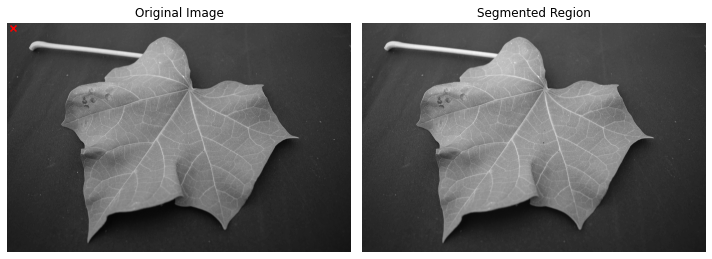

In [15]:
def region_growing(image, seed):
    height, width = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)
    stack = [seed]

    while stack:
        current_pixel = stack.pop()
        y, x = current_pixel

        if y < 0 or y >= height or x < 0 or x >= width or visited[y, x]:
            continue
        
        visited[y, x] = 1
        region[y, x] = image[y, x]

        neighbors = [(y - 1, x), (y + 1, x), (y, x - 1), (y, x + 1)]
        for neighbor in neighbors:
            ny, nx = neighbor
            if 0 <= ny < height and 0 <= nx < width and not visited[ny, nx]:
                if abs(int(image[ny, nx]) - int(image[y, x])) < threshold:
                    stack.append((ny, nx))
    
    return region

# Load the image in grayscale
image = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG", cv2.IMREAD_GRAYSCALE)

# Seed pixel and threshold for region growing
seed = (100, 100)
threshold = 10

# Perform region growing segmentation
segmented_region = region_growing(image, seed)

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='x', label='Seed Pixel')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_region, cmap='gray')
plt.title("Segmented Region")
plt.axis('off')

plt.tight_layout()
plt.show()

<span style="color:blue;font-weight:700;font-size:20px">
Edge Detection Image Segmentation
</span>


<span style="color:red;font-weight:700;font-size:20px">
Edge detection is a fundamental technique in image processing used to identify boundaries or edges between different objects or regions in an image. It's often used as a pre-processing step for more advanced tasks like image segmentation. Here's a step-by-step explanation of edge 
detection for image segmentation:

Load the Image:
Load the image you want to perform edge detection on.

Convert to Grayscale:
Convert the image to grayscale if it's in color. Grayscale images have a single intensity channel, making edge detection simpler.

Apply Smoothing (Optional):
Apply a Gaussian blur or other smoothing filters to reduce noise and enhance edge detection results. This step can help in suppressing small fluctuations in pixel values.

Calculate Gradient Magnitude:
Apply edge detection operators, such as Sobel, Prewitt, or Scharr, to compute the gradient magnitude of the image. These operators highlight rapid changes in intensity.

Apply Thresholding:
Set a threshold value on the gradient magnitude. Pixels with values above the threshold are considered as edges, while those below the threshold are considered non-edges. This results in a binary image where edges are represented as white pixels.

Edge Enhancement (Optional):
If desired, you can apply post-processing techniques like morphological operations (dilation, erosion) to enhance and refine the detected edges.

Overlay on Original Image (Optional):
Overlay the detected edges on the original image to visualize the edges in context.

Display the Result:
Display the resulting edge-detected image using visualization tools like Matplotlib or OpenCV.
</span>

<span style="color:yellow;font-weight:700;font-size:20px">
Canny edge detection is a popular algorithm for detecting edges in images. It involves several steps to identify the significant edges while suppressing noise. Here are the key steps involved in the Canny edge detection algorithm:

Grayscale Conversion:
Convert the input image to grayscale if it's in color. This simplifies the edge detection process, as it focuses on intensity changes.

Gaussian Blur:
Apply Gaussian smoothing to reduce noise and small variations in intensity. The convolution with a Gaussian kernel blurs the image.

Gradient Calculation:
Compute the gradient magnitude and direction at each pixel. This involves calculating the gradient in both the x and y directions using gradient operators (Sobel, Prewitt, or Scharr).

Non-Maximum Suppression:
Suppress non-maximum values by considering the gradient magnitude and direction. This step helps to thin out edges and keep only the most prominent ones.

Double Thresholding:
Apply double thresholding to classify edges as strong, weak, or non-edges. Pixels with gradient values above a high threshold are marked as strong edges, while those between high and low thresholds are marked as weak edges.

Edge Tracking by Hysteresis:
Strengthen weak edges by connecting them to strong edges. Start from strong edges and follow connected weak edges. If a weak edge doesn't connect to a strong edge, it's discarded.

Edge Detection Output:
The final result is a binary image with strong edges forming continuous lines, and weak edges contributing to those lines where they are connected.
</span>

<span style="color:yellow;font-weight:700;font-size:20px">
Sobel edge detection is a gradient-based edge detection method that highlights edges in an image by computing the gradient magnitude. Here are the steps involved in the Sobel edge detection algorithm:

Grayscale Conversion:
Convert the input image to grayscale if it's in color. This simplifies the edge detection process, as it focuses on intensity changes.

Convolution with Sobel Kernels:
Apply convolution with Sobel kernels to calculate gradient values for both the x and y directions. Sobel kernels are small matrices used for computing the gradients. There are two separate kernels for the x-direction and y-direction gradients:

Sobel kernel for x-direction gradient:

-1  0  1

-2  0  2

-1  0  1

Sobel kernel for y-direction gradient:

-1 -2 -1

 0  0  0
 
 1  2  1

Gradient Magnitude Calculation:
Calculate the gradient magnitude at each pixel using the gradients obtained from the convolution with the Sobel kernels. The gradient magnitude is 
computed as the square root of the sum of the squared x-direction and y-direction gradients:
gradient_magnitude = sqrt((gradient_x)^2 + (gradient_y)^2)

Thresholding (Optional):
You can apply thresholding to the gradient magnitude to highlight strong edges. Pixels with gradient magnitudes above a certain threshold are considered as edges.

Edge Detection Output:
The resulting image represents edges in the original image, with higher values indicating stronger edges.
</span>

<span style="color:yellow;font-weight:700;font-size:20px">
Laplacian image segmentation is an edge detection method that emphasizes regions with rapid intensity changes. It detects areas of an image where the intensity changes quickly, which often correspond to edges or boundaries between different objects or regions. Here are the steps involved in the Laplacian image segmentation process:

Grayscale Conversion:
Convert the input image to grayscale if it's in color. This simplifies the edge detection process, as it focuses on intensity changes.

Apply Laplacian Filter:
Apply the Laplacian filter to the grayscale image. The Laplacian filter is a second-order derivative filter that enhances high-frequency components (edges) in the image.

The Laplacian filter kernel:

0  1  0

1 -4  1

0  1  0

Enhance Edges (Optional):
The Laplacian result can sometimes produce both positive and negative values. Taking the absolute value of the Laplacian image can help enhance the edges for visualization.

Thresholding (Optional):
You can apply thresholding to the Laplacian result to highlight edges more prominently. Pixels with Laplacian values above a certain threshold are considered as edges.

Edge Detection Output:
The resulting image represents edges in the original image, with higher values indicating areas of rapid intensity changes.
</span>

<span style="color:yellow;font-weight:700;font-size:20px">
Prewitt edge detection is a gradient-based edge detection method similar to Sobel edge detection. It calculates the gradient magnitude of an image to identify edges. Here are the steps involved in the Prewitt edge detection algorithm:

Grayscale Conversion:
Convert the input image to grayscale if it's in color. This simplifies the edge detection process, as it focuses on intensity changes.

Convolution with Prewitt Kernels:
Apply convolution with Prewitt kernels to calculate gradient values for both the x and y directions. Prewitt kernels are used for computing the gradients, similar to Sobel kernels. There are two separate kernels for the x-direction and y-direction gradients:

Prewitt kernel for x-direction gradient:

-1  0  1

-1  0  1

-1  0  1


Prewitt kernel for y-direction gradient:

-1 -1 -1

 0  0  0

 1  1  1

Gradient Magnitude Calculation:
Calculate the gradient magnitude at each pixel using the gradients obtained from the convolution with the Prewitt kernels. The gradient magnitude is computed as the square root of the sum of the squared x-direction and y-direction gradients:
gradient_magnitude = sqrt((gradient_x)^2 + (gradient_y)^2)

Thresholding (Optional):
You can apply thresholding to the gradient magnitude to highlight strong edges. Pixels with gradient magnitudes above a certain threshold are considered as edges.

Edge Detection Output:
The resulting image represents edges in the original image, with higher values indicating stronger edges.
</span>

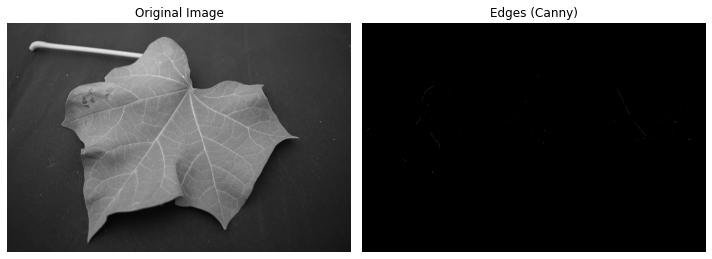

In [16]:
def edge_detection(image_path, threshold1, threshold2):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1, threshold2)

    # Display the original and edge-detected images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Canny)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Replace with your image path
image_path = "C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG"

# Set Canny thresholds
threshold1 = 100
threshold2 = 200

edge_detection(image_path, threshold1, threshold2)

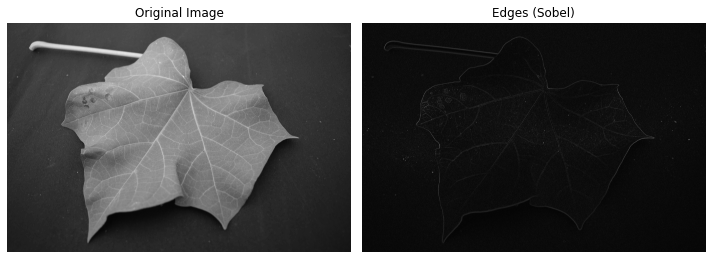

In [17]:
def sobel_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    edges = np.sqrt(sobel_x**2 + sobel_y**2)
    edges = np.uint8(edges)

    # Display the original image and edge-detected image using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Sobel)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Replace with your image path
image_path = "C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG"

sobel_edge_detection(image_path)

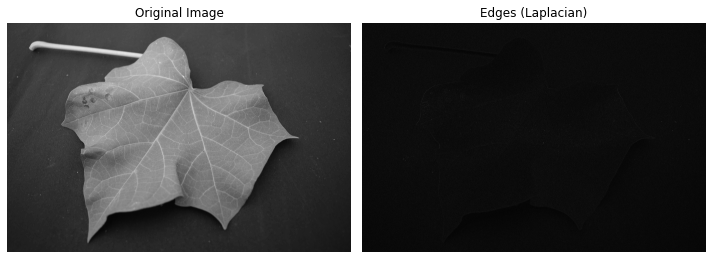

In [18]:
def laplacian_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Laplacian edge detection
    edges = cv2.Laplacian(image, cv2.CV_64F)
    edges = np.uint8(np.absolute(edges))

    # Display the original image and edge-detected image using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Laplacian)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Replace with your image path
image_path = "C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG"

laplacian_edge_detection(image_path)

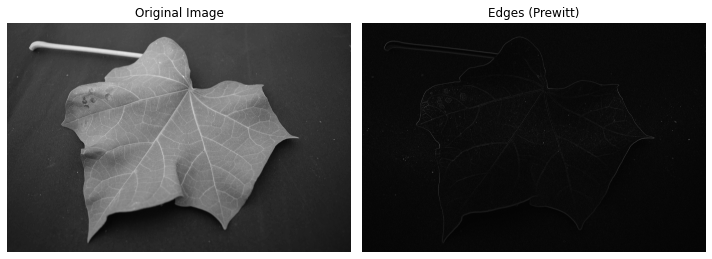

In [19]:
def prewitt_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Prewitt edge detection
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    edges_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    edges_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(edges)

    # Display the original image and edge-detected image using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Prewitt)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Replace with your image path
image_path = "C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG"

prewitt_edge_detection(image_path)

<span style="color:blue;font-weight:700;font-size:20px">
ANN Based Image Segmentation
</span>


<span style="color:red;font-weight:700;font-size:20px">
Image segmentation using artificial neural networks (ANNs) involves training a neural network model to predict the segmentation masks of objects or regions in an image. Here's a general outline of the process:

Data Preparation:

Gather a dataset of images along with their corresponding segmentation masks.
Preprocess the images and masks (resize, normalize, etc.) to ensure consistency.
Split the dataset into training, validation, and test sets.

Model Architecture Selection:

Choose a neural network architecture suitable for image segmentation.
Common architectures include U-Net, Fully Convolutional Networks (FCN), and DeepLab.

Network Architecture Design:

Design the neural network layers and connections to capture both low-level and high-level features.
Use convolutional layers to extract features and upsampling layers to restore spatial resolution.

Loss Function Selection:

Choose an appropriate loss function for image segmentation, such as pixel-wise cross-entropy loss or Dice loss.
The loss function quantifies the difference between predicted and ground truth segmentation masks.

Training:

Train the neural network using the training dataset.
Minimize the chosen loss function using gradient descent optimization methods (e.g., Adam, SGD).

Validation:

Monitor the model's performance on the validation set during training.
Use metrics like Intersection over Union (IoU) and pixel accuracy to assess segmentation quality.

Hyperparameter Tuning:

Adjust hyperparameters like learning rate, batch size, and regularization to optimize the model's performance.

Evaluation:

Evaluate the trained model on the test set to assess its generalization ability.
Generate segmentation masks for test images and compare them to ground truth masks.

Post-processing (Optional):

Apply post-processing techniques to refine segmentation results, such as morphological operations or conditional random fields.

Inference:

Use the trained model for segmenting new, unseen images.
Feed the input image through the network to obtain predicted segmentation masks.

Visualization:

Overlay the predicted segmentation masks on the original images for visual inspection.

Popular libraries for implementing image segmentation using neural networks in Python include TensorFlow, Keras, and PyTorch. Architectures like U-Net are widely used for their effectiveness in image segmentation tasks.
</span>

Epoch 1/10
1/1 [==============================] - 1s 846ms/step - loss: 0.0835 - accuracy: 0.0394
Epoch 2/10
1/1 [==============================] - 0s 192ms/step - loss: 0.0836 - accuracy: 0.0497
Epoch 3/10
1/1 [==============================] - 0s 213ms/step - loss: 0.0840 - accuracy: 0.0610
Epoch 4/10
1/1 [==============================] - 0s 196ms/step - loss: 0.0843 - accuracy: 0.0206
Epoch 5/10
1/1 [==============================] - 0s 221ms/step - loss: 0.0850 - accuracy: 0.0140
Epoch 6/10
1/1 [==============================] - 0s 181ms/step - loss: 0.0855 - accuracy: 0.0113
Epoch 7/10
1/1 [==============================] - 0s 179ms/step - loss: 0.0860 - accuracy: 0.0094
Epoch 8/10
1/1 [==============================] - 0s 158ms/step - loss: 0.0862 - accuracy: 0.0081
Epoch 9/10
1/1 [==============================] - 0s 176ms/step - loss: 0.0865 - accuracy: 0.0074
Epoch 10/10
1/1 [==============================] - 0s 93ms/step


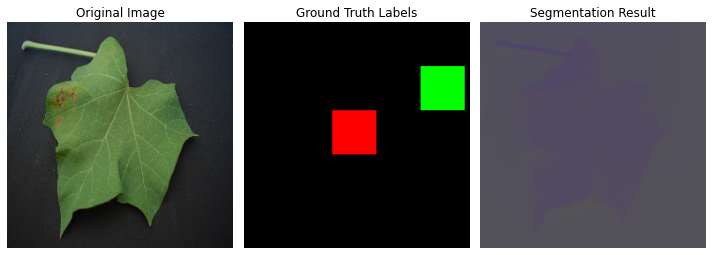

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess image and corresponding labels
image = cv2.imread("C:\\Users\\ASUS\\Downloads\\DEEP_LEARNING_CV\\image segmentation\\DSC_0161.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))
image = image / 255.0

# Generate synthetic labels (for demonstration purposes)
labels = np.zeros_like(image)
labels[100:150, 100:150, :] = [1, 0, 0]  # Red region
labels[50:100, 200:250, :] = [0, 1, 0]  # Green region

# Define a simple FCN model
model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(3, (1, 1), activation='softmax', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (use actual labeled data for real-world applications)
model.fit(image[np.newaxis, ...], labels[np.newaxis, ...], epochs=10, batch_size=1)

# Perform segmentation using the trained model
segmentation_result = model.predict(image[np.newaxis, ...])

# Display the original image, ground truth labels, and segmentation result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(labels)
plt.title("Ground Truth Labels")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmentation_result[0])
plt.title("Segmentation Result")
plt.axis('off')

plt.tight_layout()
plt.show()